# Assignment 1: MLP Classifier

## Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

## Data analysis

In [ ]:
! ls

sample_data  test.csv  train.csv


In [ ]:
train_df = pd.read_csv('train.csv', header=None)
test_df = pd.read_csv('test.csv', header=None)

In [ ]:
print(train_df.shape)
print(test_df.shape)
# (num_samples, num_features)

(60000, 785)
(10000, 785)


In [ ]:
# number of features
num_features = train_df.shape[1]
print(num_features)

785


In [ ]:
train_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_df.iloc[:,0]

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [ ]:
test_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
value_counts = train_df.iloc[:, 0].value_counts()
value_counts.index = pd.to_numeric(value_counts.index)
value_counts = value_counts.sort_index()
value_counts

,count
0,
0,5923
1,6742
2,5958
3,6131
4,5842
5,5421
6,5918
7,6265
8,5851


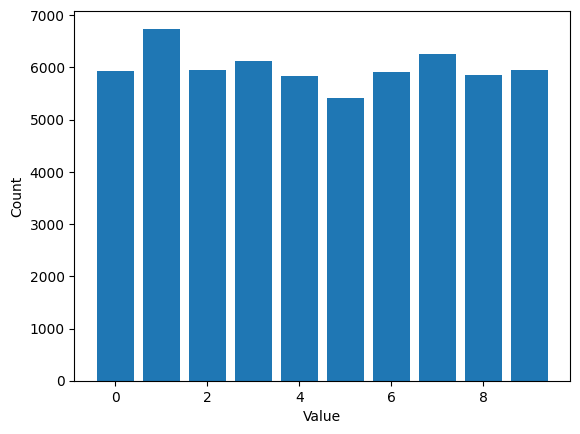

In [ ]:
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

Labels are somewhat uniform

## Data split

In [ ]:
# splits train and test datasets into features and labels
X_train = train_df.iloc[:, 1:]
y_train = train_df.iloc[:, 0]
X_test = test_df.iloc[:, 1:]
y_test = test_df.iloc[:, 0]

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_train.head(5)

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.head(5)

,0
0,5
1,0
2,4
3,1
4,9


## Model

In [ ]:
model = MLPClassifier(verbose=True, early_stopping=True, hidden_layer_sizes=(100,100,100), random_state=42)

## Training and inference

In [ ]:
model.fit(X_train, y_train)

Iteration 1, loss = 1.75067123
Validation score: 0.882667
Iteration 2, loss = 0.36941786
Validation score: 0.916167
Iteration 3, loss = 0.23314119
Validation score: 0.933667
Iteration 4, loss = 0.16278933
Validation score: 0.933000
Iteration 5, loss = 0.13102743
Validation score: 0.940167
Iteration 6, loss = 0.10794141
Validation score: 0.946667
Iteration 7, loss = 0.09199659
Validation score: 0.945500
Iteration 8, loss = 0.07952575
Validation score: 0.947333
Iteration 9, loss = 0.06976508
Validation score: 0.945167
Iteration 10, loss = 0.07528120
Validation score: 0.952833
Iteration 11, loss = 0.06920350
Validation score: 0.951833
Iteration 12, loss = 0.06577288
Validation score: 0.951167
Iteration 13, loss = 0.06641788
Validation score: 0.955333
Iteration 14, loss = 0.06550490
Validation score: 0.955000
Iteration 15, loss = 0.06648866
Validation score: 0.961000
Iteration 16, loss = 0.05619206
Validation score: 0.958667
Iteration 17, loss = 0.04959189
Validation score: 0.960500
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100, 100),
              random_state=42, verbose=True)

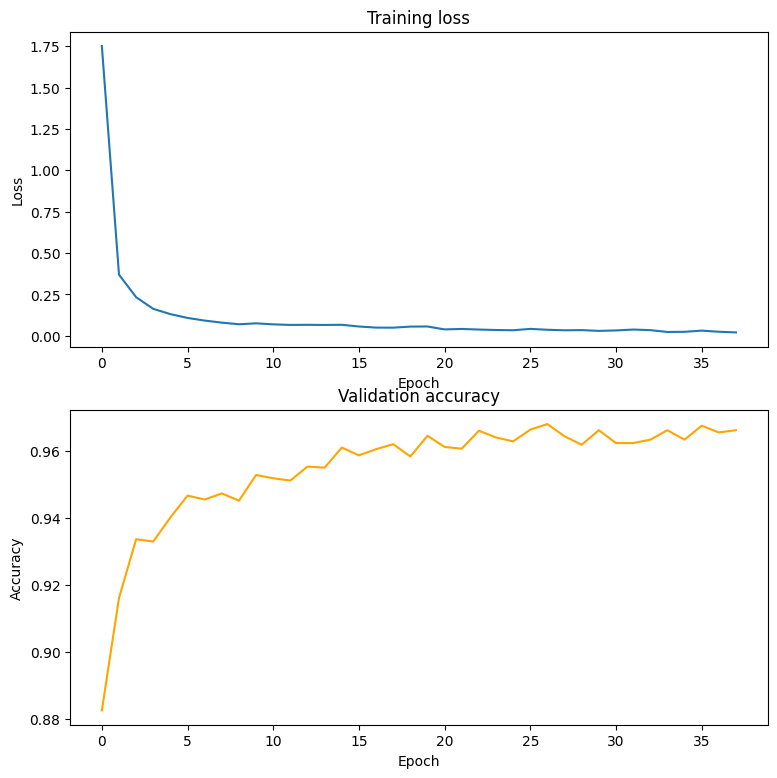

In [ ]:
# training curve
fig, ax =  plt.subplots(2, figsize=(9,9))
ax[0].plot(model.loss_curve_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].title.set_text('Training loss')
ax[1].plot(model.validation_scores_, color='orange')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].title.set_text('Validation accuracy')
plt.show()

In [ ]:
pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.97      0.95      0.96      1010
           4       0.96      0.98      0.97       982
           5       0.95      0.96      0.95       892
           6       0.97      0.98      0.97       958
           7       0.96      0.97      0.97      1028
           8       0.96      0.94      0.95       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



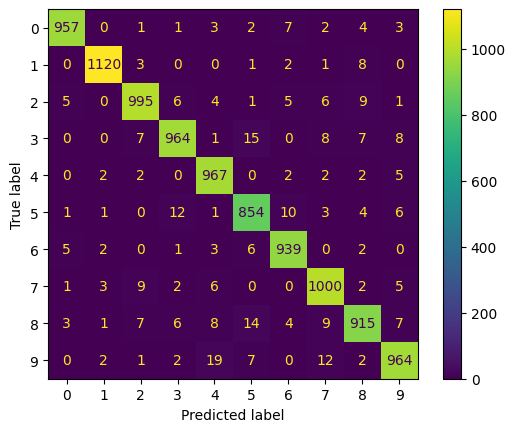

In [ ]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Ablation studies

### Three 50-neuron hidden layers

In [ ]:
# training with smaller hidden layers
model = MLPClassifier(early_stopping=True, hidden_layer_sizes=(50, 50, 50), random_state=42)
model.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(50, 50, 50),
              random_state=42)

In [ ]:
pred = model.predict(X_test)
print('50-50-50'.center(53, '-'))
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.95      0.95      1010
           4       0.93      0.97      0.95       982
           5       0.95      0.95      0.95       892
           6       0.98      0.96      0.97       958
           7       0.95      0.96      0.96      1028
           8       0.94      0.95      0.95       974
           9       0.96      0.92      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



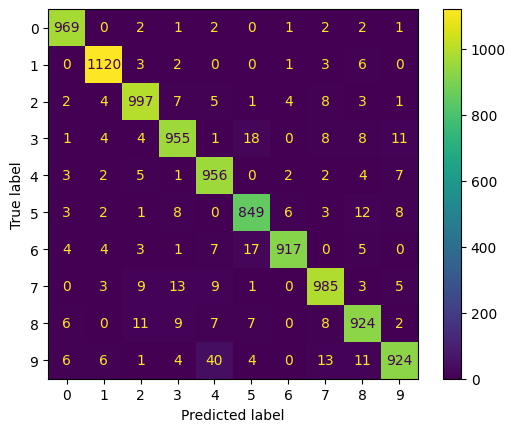

In [ ]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Two 100-neuron hidden layers

In [ ]:
# 2 hidden layers
model = MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100), random_state=42)
model.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100),
              random_state=42)

In [ ]:
print(model.n_layers_)

4


In [ ]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.96      0.97      0.97       982
           5       0.97      0.95      0.96       892
           6       0.97      0.96      0.97       958
           7       0.96      0.97      0.96      1028
           8       0.94      0.96      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



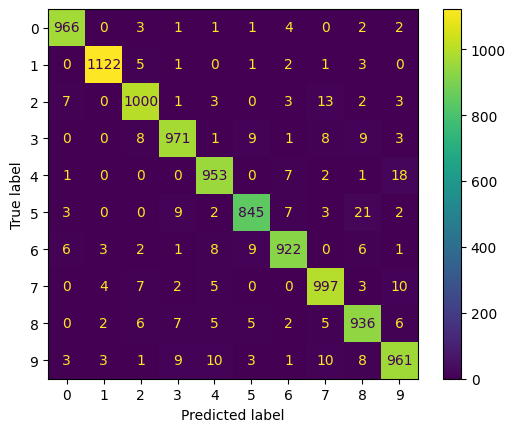

In [ ]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Two 50-node hidden layers

In [ ]:
# 2 50-node layers
model = MLPClassifier(early_stopping=True, hidden_layer_sizes=(50,50), random_state=42)
model.fit(X_train, y_train)

In [ ]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.94      0.97      0.95      1010
           4       0.96      0.97      0.97       982
           5       0.97      0.95      0.96       892
           6       0.96      0.98      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.94      0.95      0.95       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.97      0.97      0.97     10000



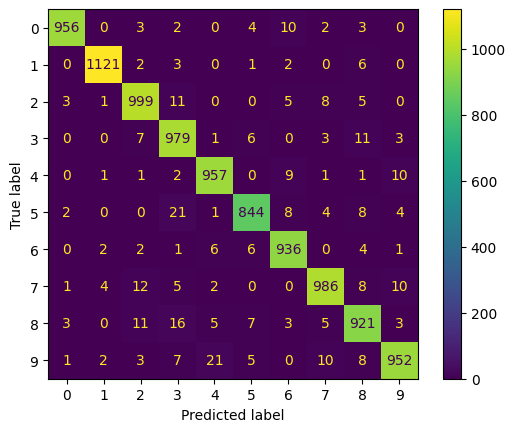

In [ ]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()